In [1]:
import copy
import random as rnd
import math
import numpy as np
import matplotlib.pyplot as plt

### Updated model
- In this model, type 1 T-cell (the ones reacting to cancer cells) are stimulated by the presence of cancer: they divide more if there are many cancer cells
- This is expressed by the reaction propensity of the first reaction (division of type 1 T-cells): it depends not only on the population of T-cells (pop0) but, also on the population of cancer cells (pop2)
- This updated reaction now has a new parameter, which is *not* the same as the parameter for type 2 T-cell division - this distinguishes type 1 and type 2 T-cells.
- Overall now we have 5 parameters: type 1 T-cell division rate, type 2 T-cell division rate, T-cell death rate, cancer cell division rate and cancer cell killing rate

In [2]:
# Define the reaction propensity function and change matrix that describes the reactions that can occur

def reaction_propensities(pop, params):
    r0 = params[0]*pop[0]*pop[2] # type 1 T-cell divides, depending on the amount of cancer cells
    r1 = params[1]*pop[1] # type 2 T-cell divides
    r2 = params[2]*pop[0] # type 1 T-cell dies/leaves
    r3 = params[2]*pop[1] # type 2 T-cell dies/leaves
    r4 = params[3]*pop[2] # cancer cell divides
    r5 = params[4]*pop[2]*pop[0] # T-cell kills cancer cell
    
    return([r0,r1,r2,r3,r4,r5])

changes_per_reaction = np.array([[1, 0, 0], # first reaction: +1 type1, +0 type2, +0 cancer cells
                                 [0, 1, 0], # second reaction: +0 type1, +1 type2, +0 cancer cells
                                 [-1, 0, 0],
                                 [0, -1, 0],
                                 [0, 0, 1],
                                 [0, 0, -1]]) # last reaction: +0 type1, +0 type2, -1 cancer cells 

In [3]:
# Define the starting numbers of cells and parameters about the reactions

starting_population = np.array([100, 100, 50]) # number of type1 T, type2 T, cancer cells
parameters = [0.01,0.5, 0.5, 5.0, 0.01] #type 1, type2 T-cell div rate, T-cell death rate, cancer cell division rate, T-cell killing rate
tMax = 1.0 # the end point until which we want to simulate, e.g. the final time

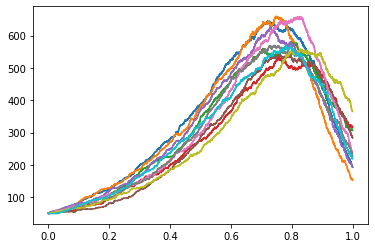

In [4]:
# Before, we made a loop that does the single simulation step until we reach the end point
# Now we put even that loop in another loop to run more than one simulation

result_model = []

for i in range(10):
    #print('Hello')
    
    population = starting_population
    pop_over_time = np.array(population) # store the population values over time in this
    t = 0.0
    time = np.array(t)

    while t < tMax:
        # Fill in the code here to perform one single simulation
        # # compute reaction probabilities: this changes as population changes
        #

        # # get how much time until next reaction
        # # get which reaction happens
        # # change population accordingly
    
        #
        # # note down the new time
        # # this is the equivalent of append, but adds a new row
        
    plt.step(time, pop_over_time[:,2]) # this plots the third type of cell, which is cancer cells
    result_model.append(pop_over_time[-1,2])

In [24]:
print(result_model)

[161, 168, 208, 198, 210, 441, 165, 327, 258, 184]


In [8]:
print(np.shape(time))
print(np.shape(pop_over_time))
print(np.shape(result_model))

(4294,)
(4294, 3)
(10,)


(array([4., 3., 0., 1., 0., 1., 0., 0., 0., 1.]),
 array([161., 189., 217., 245., 273., 301., 329., 357., 385., 413., 441.]),
 <a list of 10 Patch objects>)

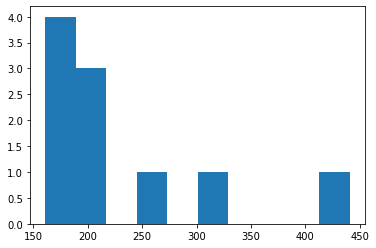

In [26]:
plt.hist(result_model)